# Embedding space

This document will explore the training and analysis of our embedding space.

In [1]:
%pip install scipy==1.10.0
%pip install gensim
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install pacmap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv
import pandas as pd
from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt



/var/folders/gh/zbst6d7n5434l6003rnm5nph0000gn/T/ipykernel_9222/3571903053.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

# Model first try


In [5]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=1)


(78611, 160360)

In [22]:
model.wv.vectors

array([[ 0.03244122,  0.12160822, -0.00545629, ...,  0.00645795,
         0.15663713, -0.16637014],
       [ 0.03892565,  0.12825562,  0.00079914, ..., -0.08008432,
         0.1409931 , -0.10508603],
       [ 0.02159134,  0.12000423, -0.01849766, ..., -0.06738248,
         0.15782474, -0.11594489],
       ...,
       [ 0.00053952,  0.04195056,  0.0040848 , ..., -0.01217843,
         0.04050147, -0.03730068],
       [ 0.000312  ,  0.03315017, -0.00050847, ..., -0.01197318,
         0.03040095, -0.03139995],
       [-0.00246688,  0.0474292 , -0.00158858, ..., -0.01507242,
         0.04473767, -0.04527939]], dtype=float32)

# Vanløse test case

In [26]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter = Counter()
list_of_stations_with_vanløse = []

# Iterate over each journey list
for journey in sequences:
    # Check if 'Vanløse St.' is present in the journey
    if 'Vanløse St.' in journey:
        # Iterate over each station in the journey
        for station in journey:
            # Exclude 'Vanløse St.' from counting
            if station != 'Vanløse St.':
                # Increment the count for the station
                station_counter[station] += 1

# Sort the station counts by count (descending order)
sorted_stations = sorted(station_counter.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations:
    if sta[1] > 7:
        list_of_stations_with_vanløse.append(sta[0])

# Print the station counts
for station, count in sorted_stations:
    print(f"{station}: {count}")


Nørreport St.: 3846
Kongens Nytorv St. (Metro): 2482
CPH Lufthavn: 2445
København H: 1972
Amagerbro St. (Metro): 942
København H (Metro): 929
Dybbølsbro St.: 902
Nørreport St. (Metro): 809
Forum St. (Metro): 720
Christianshavn St. (Metro): 644
Carlsberg St.: 601
Islands Brygge St. (Metro): 533
Lergravsparken St. (Metro): 524
Christianshavn St.: 522
Ørestad St.: 509
Bella Center St. (Metro): 473
Rådhuspladsen St. (Metro): 454
Vestamager St. (Metro): 440
Vesterport St.: 434
Nordhavn St.: 363
Forum St.: 347
Ørestad St. (Metro): 303
Kongens Nytorv: 300
Trianglen St. (Metro): 285
Kastrup St. (Metro): 284
Kongens Nytorv St.: 278
Amager Strand St. (Metro): 261
Østerport St.: 249
Femøren St. (Metro): 248
Enghave Plads St.: 226
Islands Brygge St.: 218
Øresund St. (Metro): 198
Gammel Strand St. (Metro): 187
Nørre Farimagsgade: 184
Rådhuspladsen: 169
Enghave Plads St. (Metro): 153
Frederiksberg Allé St. (Metro): 148
Amagerbro St.: 128
Marmorkirken St. (Metro): 128
Vestamager St.: 124
Sundby St. (

In [27]:
list_of_stations_with_vanløse

['Nørreport St.',
 'Kongens Nytorv St. (Metro)',
 'CPH Lufthavn',
 'København H',
 'Amagerbro St. (Metro)',
 'København H (Metro)',
 'Dybbølsbro St.',
 'Nørreport St. (Metro)',
 'Forum St. (Metro)',
 'Christianshavn St. (Metro)',
 'Carlsberg St.',
 'Islands Brygge St. (Metro)',
 'Lergravsparken St. (Metro)',
 'Christianshavn St.',
 'Ørestad St.',
 'Bella Center St. (Metro)',
 'Rådhuspladsen St. (Metro)',
 'Vestamager St. (Metro)',
 'Vesterport St.',
 'Nordhavn St.',
 'Forum St.',
 'Ørestad St. (Metro)',
 'Kongens Nytorv',
 'Trianglen St. (Metro)',
 'Kastrup St. (Metro)',
 'Kongens Nytorv St.',
 'Amager Strand St. (Metro)',
 'Østerport St.',
 'Femøren St. (Metro)',
 'Enghave Plads St.',
 'Islands Brygge St.',
 'Øresund St. (Metro)',
 'Gammel Strand St. (Metro)',
 'Nørre Farimagsgade',
 'Rådhuspladsen',
 'Enghave Plads St. (Metro)',
 'Frederiksberg Allé St. (Metro)',
 'Amagerbro St.',
 'Marmorkirken St. (Metro)',
 'Vestamager St.',
 'Sundby St. (Metro)',
 'Rigshospitalet Syd',
 'Frederik

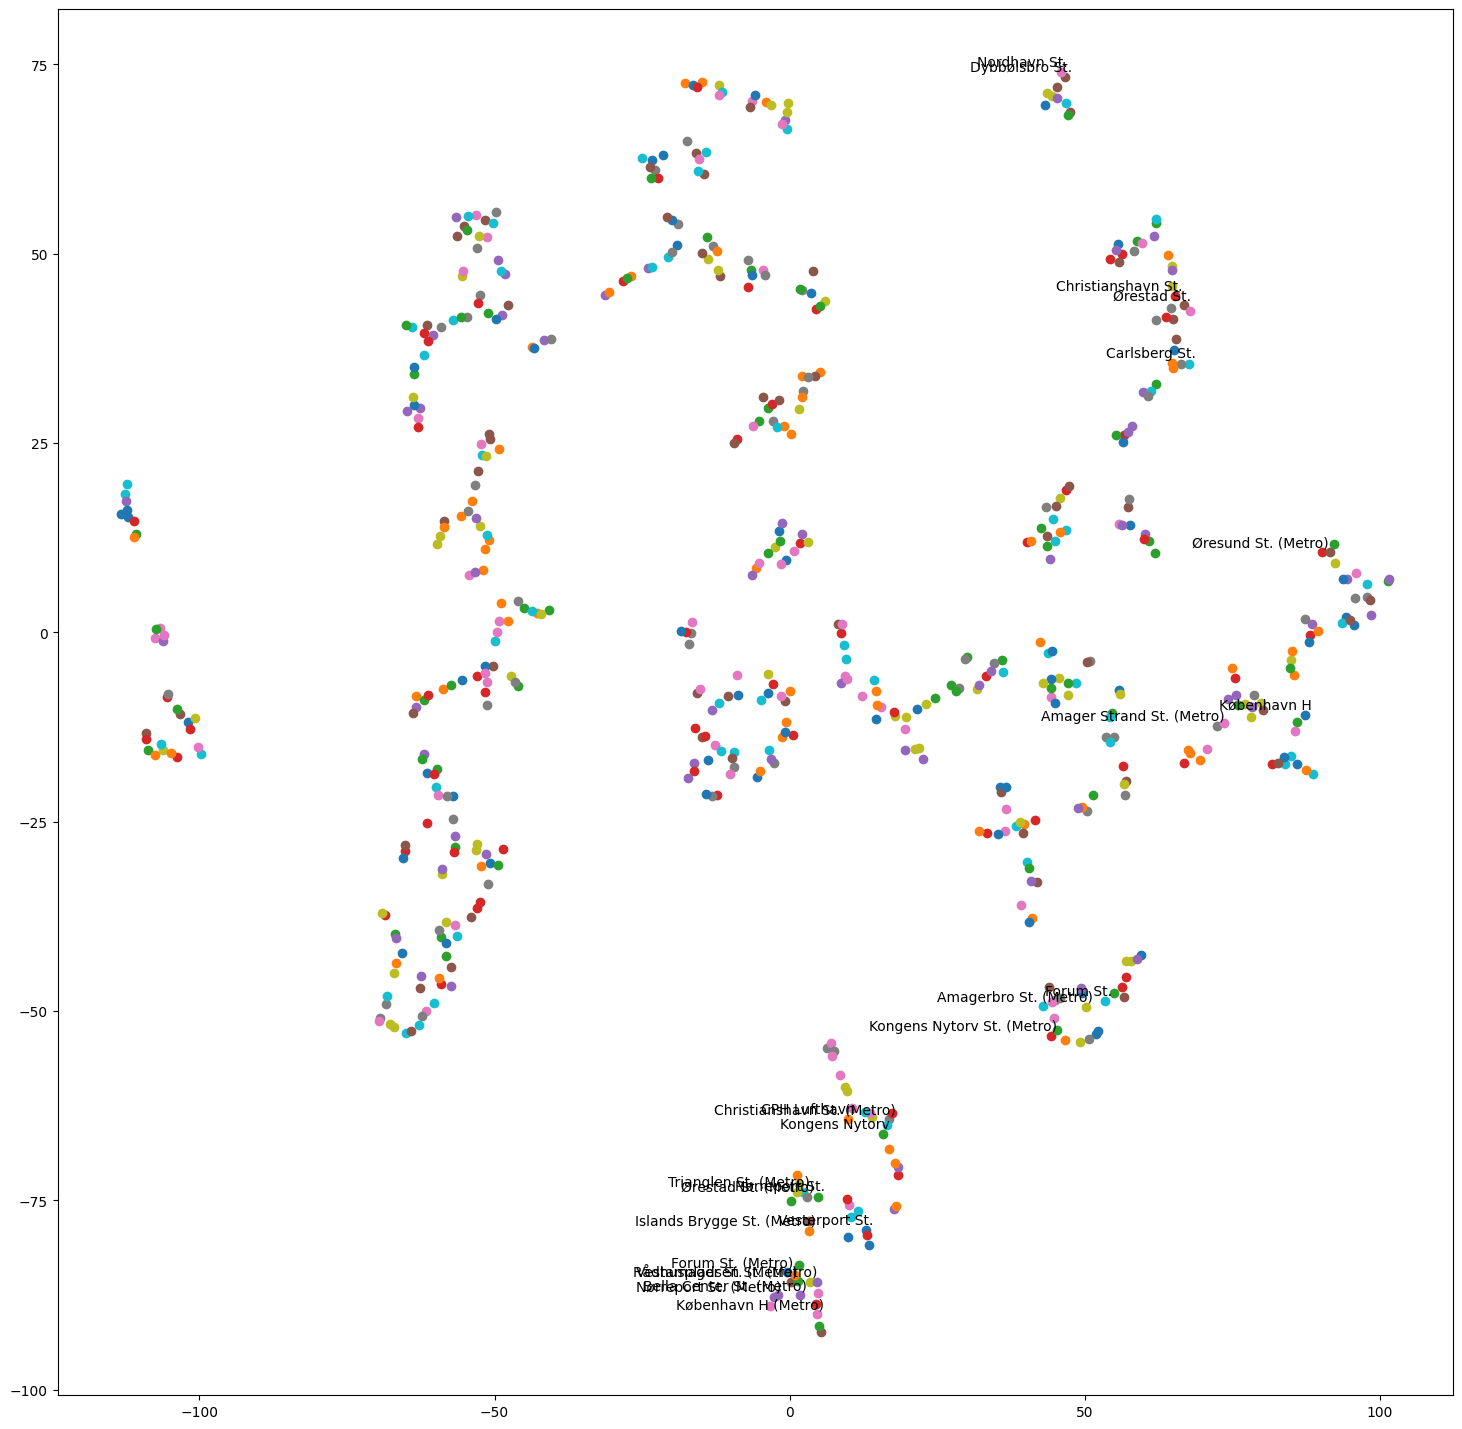

In [30]:
from matplotlib import pyplot as plt


def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_vanløse:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# København H (Metro) Test

In [17]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter_kbh_metro = Counter()
list_of_stations_with_kbh_metro = []

# Iterate over each journey list
for journey in sequences:
    if 'København H (Metro)' in journey:
        # Iterate over each station in the journey
        for station in journey:
            if station != 'København H (Metro)':
                station_counter_kbh_metro[station] += 1

# Sort the station counts by count (descending order)
sorted_stations_kbh = sorted(station_counter_kbh_metro.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations_kbh:
    if sta[1] > 7:
        list_of_stations_with_kbh_metro.append(sta[0])

# Print the station counts
for station, count in sorted_stations_kbh:
    print(f"{station}: {count}")


Kongens Nytorv St. (Metro): 10523
Trianglen St. (Metro): 5142
Nørrebro St.: 4638
Marmorkirken St. (Metro): 4575
Frederiksberg St. (Metro): 3636
Gammel Strand St. (Metro): 2880
Nørreport St.: 2758
Skjolds Plads St. (Metro): 2729
Valby St.: 2507
Nørrebros Runddel St. (Metro): 2470
Poul Henningsens Plads St. (Metro): 2148
Ørestad St.: 2147
Nuuks Plads St. (Metro): 2118
Orientkaj St. (Metro): 2043
Nordhavn St.: 1973
Christianshavn St. (Metro): 1956
Enghave Plads St. (Metro): 1912
Østerport St.: 1893
CPH Lufthavn: 1836
Nordhavn St. (Metro): 1808
Aksel Møllers Have St. (Metro): 1667
Sydhavn St.: 1658
Frederiksberg Allé St. (Metro): 1647
Nørrebro St. (Metro): 1547
Bella Center St. (Metro): 1535
Vibenshus Runddel St. (Metro): 1473
Lergravsparken St. (Metro): 1468
Ørestad St. (Metro): 1354
Hellerup St.: 1350
Østerport St. (Metro): 1307
Vestamager St. (Metro): 1267
Ny Ellebjerg St.: 1131
Amagerbro St. (Metro): 993
Rådhuspladsen: 937
Vanløse St.: 929
DR Byen St. (Metro) (01/03): 887
Islands Brygg

In [18]:
list_of_stations_with_kbh_metro

['Kongens Nytorv St. (Metro)',
 'Trianglen St. (Metro)',
 'Nørrebro St.',
 'Marmorkirken St. (Metro)',
 'Frederiksberg St. (Metro)',
 'Gammel Strand St. (Metro)',
 'Nørreport St.',
 'Skjolds Plads St. (Metro)',
 'Valby St.',
 'Nørrebros Runddel St. (Metro)',
 'Poul Henningsens Plads St. (Metro)',
 'Ørestad St.',
 'Nuuks Plads St. (Metro)',
 'Orientkaj St. (Metro)',
 'Nordhavn St.',
 'Christianshavn St. (Metro)',
 'Enghave Plads St. (Metro)',
 'Østerport St.',
 'CPH Lufthavn',
 'Nordhavn St. (Metro)',
 'Aksel Møllers Have St. (Metro)',
 'Sydhavn St.',
 'Frederiksberg Allé St. (Metro)',
 'Nørrebro St. (Metro)',
 'Bella Center St. (Metro)',
 'Vibenshus Runddel St. (Metro)',
 'Lergravsparken St. (Metro)',
 'Ørestad St. (Metro)',
 'Hellerup St.',
 'Østerport St. (Metro)',
 'Vestamager St. (Metro)',
 'Ny Ellebjerg St.',
 'Amagerbro St. (Metro)',
 'Rådhuspladsen',
 'Vanløse St.',
 'DR Byen St. (Metro) (01/03)',
 'Islands Brygge St. (Metro)',
 'Hvidovre St.',
 'Øresund St. (Metro)',
 'Husum St

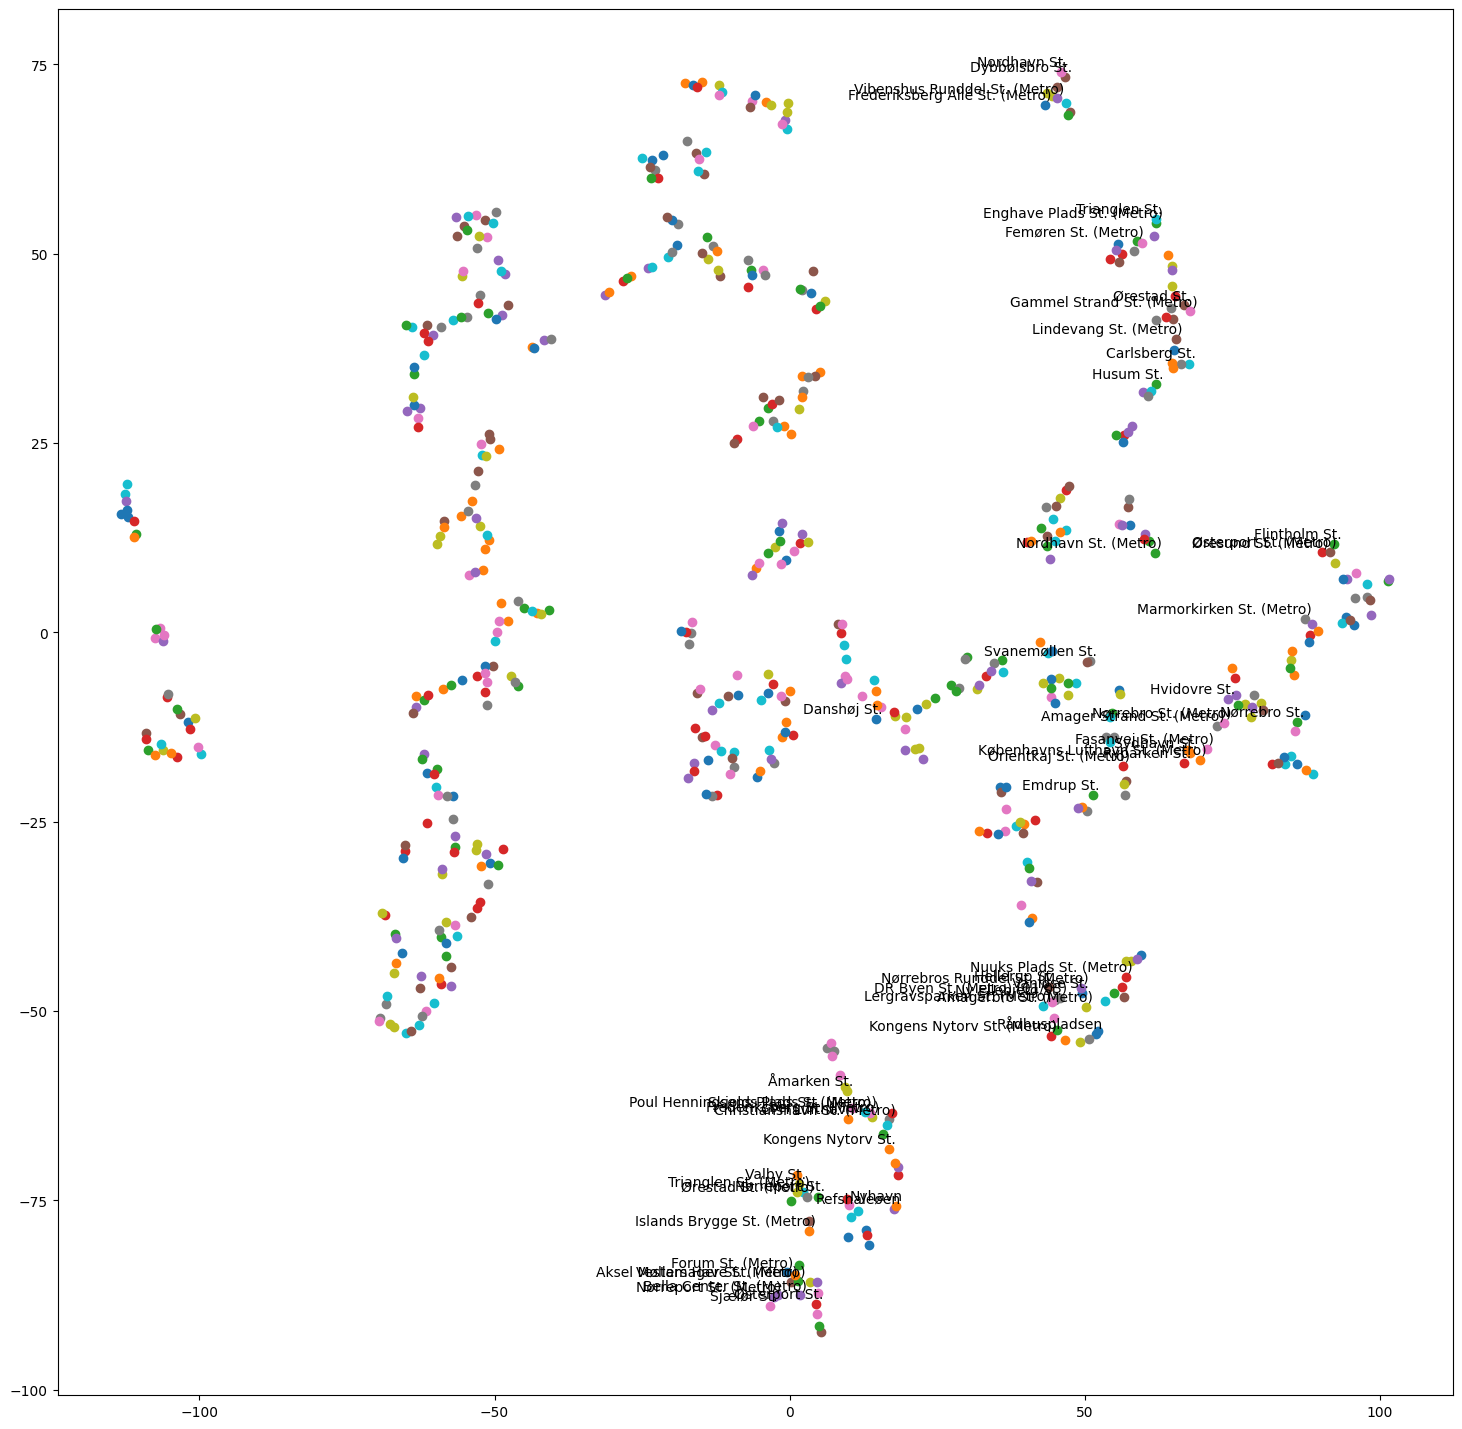

In [34]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# København H

In [22]:

from collections import Counter

# Initialize a Counter to store station counts
station_count = Counter()
stations_with_kbh = []

# Iterate over each journey list
for journey in sequences:
    if 'København H' in journey:
        # Iterate over each station in the journey
        for station in journey:
            if station != 'København H':
                station_count[station] += 1

# Sort the station counts by count (descending order)
sorted_stations = sorted(station_count.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations:
    if sta[1] > 7:
        stations_with_kbh.append(sta[0])

# Print the station counts
for station, count in sorted_stations:
    print(f"{station}: {count}")


CPH Lufthavn: 52947
Refshaleøen: 27077
Kongens Nytorv St. (Metro): 21958
Ørestad St.: 18593
Nørreport St.: 15321
Marmorkirken St. (Metro): 11293
Trianglen St. (Metro): 9643
Nordhavn St.: 8447
Østerport St.: 8266
Nørrebro St.: 7211
Gammel Strand St. (Metro): 6526
Valby St.: 6486
Amagerbro St. (Metro): 5639
Orientkaj St. (Metro): 5413
Christianshavn St. (Metro): 5393
Alliancevej: 5256
Sydhavn St.: 5228
Carlsberg St.: 5092
Elmegade: 4768
Frederiksberg St. (Metro): 4623
Bella Center St. (Metro): 4457
Ørestad St. (Metro): 4269
Sundbyvester Plads: 4250
Tårnby St.: 4120
Hellerup St.: 4087
Vestamager St. (Metro): 3971
Bodenhoffs Plads: 3943
Frederiks Brygge: 3897
Tivoli Hotel: 3883
Zoologisk Have: 3864
Dybbølsbro St.: 3840
Nordhavn St. (Metro): 3817
Lergravsparken St. (Metro): 3760
Tycho Brahes Allé: 3629
Enghave Plads St. (Metro): 3592
Amagerbro St.: 3560
Skjolds Plads St. (Metro): 3510
Nyhavnsbroen: 3508
Smyrnavej: 3157
Skt. Annæ Gade: 3043
Nørrebros Runddel St. (Metro): 3031
Ny Ellebjerg St

In [23]:
stations_with_kbh

['CPH Lufthavn',
 'Refshaleøen',
 'Kongens Nytorv St. (Metro)',
 'Ørestad St.',
 'Nørreport St.',
 'Marmorkirken St. (Metro)',
 'Trianglen St. (Metro)',
 'Nordhavn St.',
 'Østerport St.',
 'Nørrebro St.',
 'Gammel Strand St. (Metro)',
 'Valby St.',
 'Amagerbro St. (Metro)',
 'Orientkaj St. (Metro)',
 'Christianshavn St. (Metro)',
 'Alliancevej',
 'Sydhavn St.',
 'Carlsberg St.',
 'Elmegade',
 'Frederiksberg St. (Metro)',
 'Bella Center St. (Metro)',
 'Ørestad St. (Metro)',
 'Sundbyvester Plads',
 'Tårnby St.',
 'Hellerup St.',
 'Vestamager St. (Metro)',
 'Bodenhoffs Plads',
 'Frederiks Brygge',
 'Tivoli Hotel',
 'Zoologisk Have',
 'Dybbølsbro St.',
 'Nordhavn St. (Metro)',
 'Lergravsparken St. (Metro)',
 'Tycho Brahes Allé',
 'Enghave Plads St. (Metro)',
 'Amagerbro St.',
 'Skjolds Plads St. (Metro)',
 'Nyhavnsbroen',
 'Smyrnavej',
 'Skt. Annæ Gade',
 'Nørrebros Runddel St. (Metro)',
 'Ny Ellebjerg St.',
 'Christianshavn St.',
 'Frederiksberg Allé St. (Metro)',
 'Kongens Nytorv',
 'Tha

# General

Reference: ```https://towardsdatascience.com/visualizing-your-embeddings-4c79332581a9```
#### Embedding space

***Mathematical intuition***: Given two points Xi, Xj, the farther they are, the higher their distance dj|i, the higher their dissimilarity, and the lower the probability that they will consider each other neighbors.

***Key concept***: the further away two embeddings are in the space, the more dissimilar they are.

#### Perplexity
***Mathematical intuition***: The higher the perplexity, the more likely it is to consider points that are far away as neighbors.

***Advice***: The authors of SNE and t-SNE (yes, t-SNE has perplexity as well) use perplexity values between five and 50.

# More trained model

In [36]:
model_new = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model_new.build_vocab(sequences)
model_new.train(sequences, total_examples=model_new.corpus_count, epochs=500)

KeyboardInterrupt: 

# Testing using PaCMAP


In [20]:
%pip install pacmap

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pacmap
import numpy as np
import matplotlib.pyplot as plt

# Visualizing with model of all journeys cph trained 5000 times

In [3]:
model_all = Word2Vec.load("../Data/word2vec_epoch_5000.model")

## paCMAP

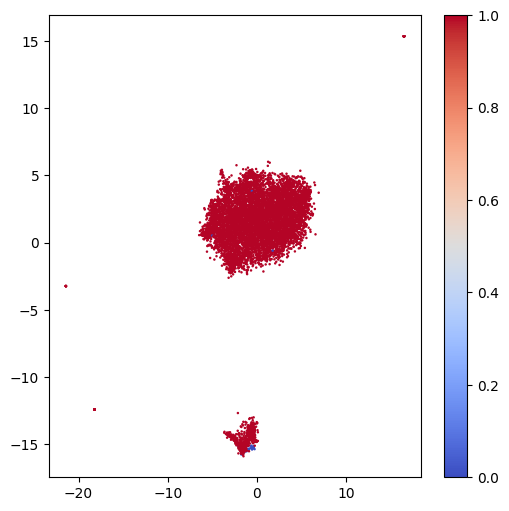

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pacmap

# Assuming model_new is your Word2Vec model
station_names = model_all.wv.index_to_key

# Generate labels based on whether "metro" is in the station name
labels = []
for station_name in station_names:
    if "metro" in station_name.lower():
        labels.append("Metro")
    else:
        labels.append("Non-Metro")

# Convert labels to numerical format
label_encoder = LabelEncoder()
label_encoder.fit(labels)
numeric_labels = label_encoder.transform(labels)

# Convert Word2Vec vectors to numpy array
X = model_all.wv.vectors

# Initializing the PaCMAP instance
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 

# Fit the data
X_transformed = embedding.fit_transform(X, init="pca")

# Visualize the embedding with different colors for "Metro" and "Non-Metro" stations
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
plt.colorbar(scatter, ax=ax)

plt.show()


Without labels

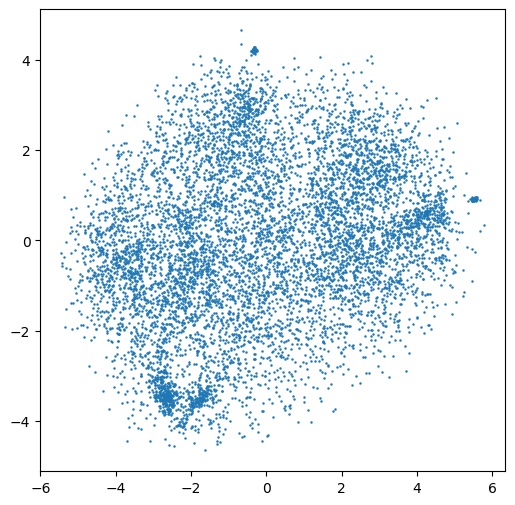

In [12]:
# Convert Word2Vec vectors to numpy array
X = model_all.wv.vectors

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, num_iters=450) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X, init="pca")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], s=0.6)

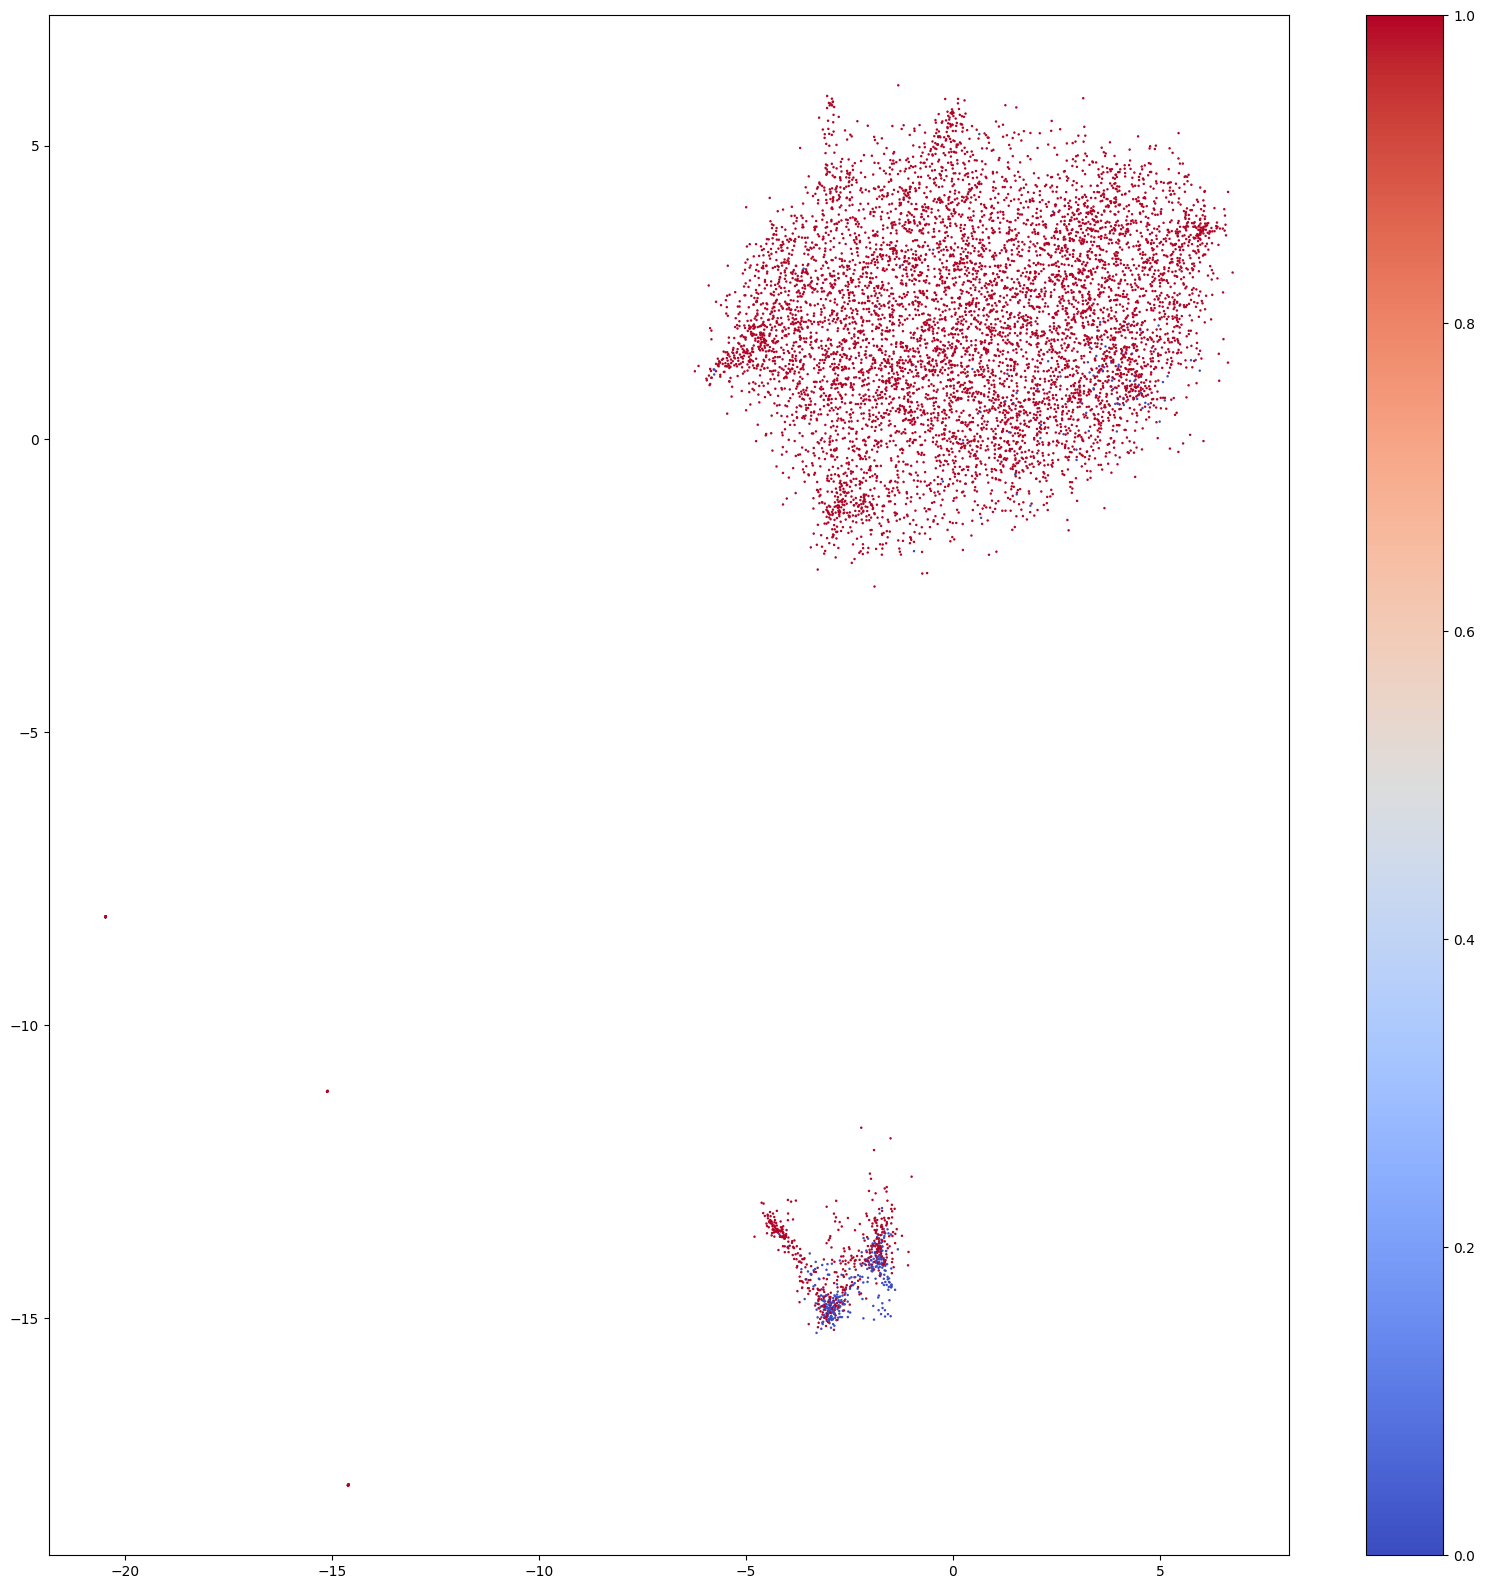

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pacmap

# Assuming model_new is your Word2Vec model
station_names = model_all.wv.index_to_key

# Generate labels based on whether "metro" is in the station name
labels = []
for station_name in station_names:
    if station_name in list_of_stations_with_kbh_metro:
        labels.append("Kbhmetro")
    else:
        labels.append("Non-Kbhmetro")

# Convert labels to numerical format
label_encoder = LabelEncoder()
label_encoder.fit(labels)
numeric_labels = label_encoder.transform(labels)

# Convert Word2Vec vectors to numpy array
X = model_all.wv.vectors

# Initializing the PaCMAP instance
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 

# Fit the data
X_transformed = embedding.fit_transform(X, init="pca")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
plt.colorbar(scatter, ax=ax)

plt.show()


## T-SNE

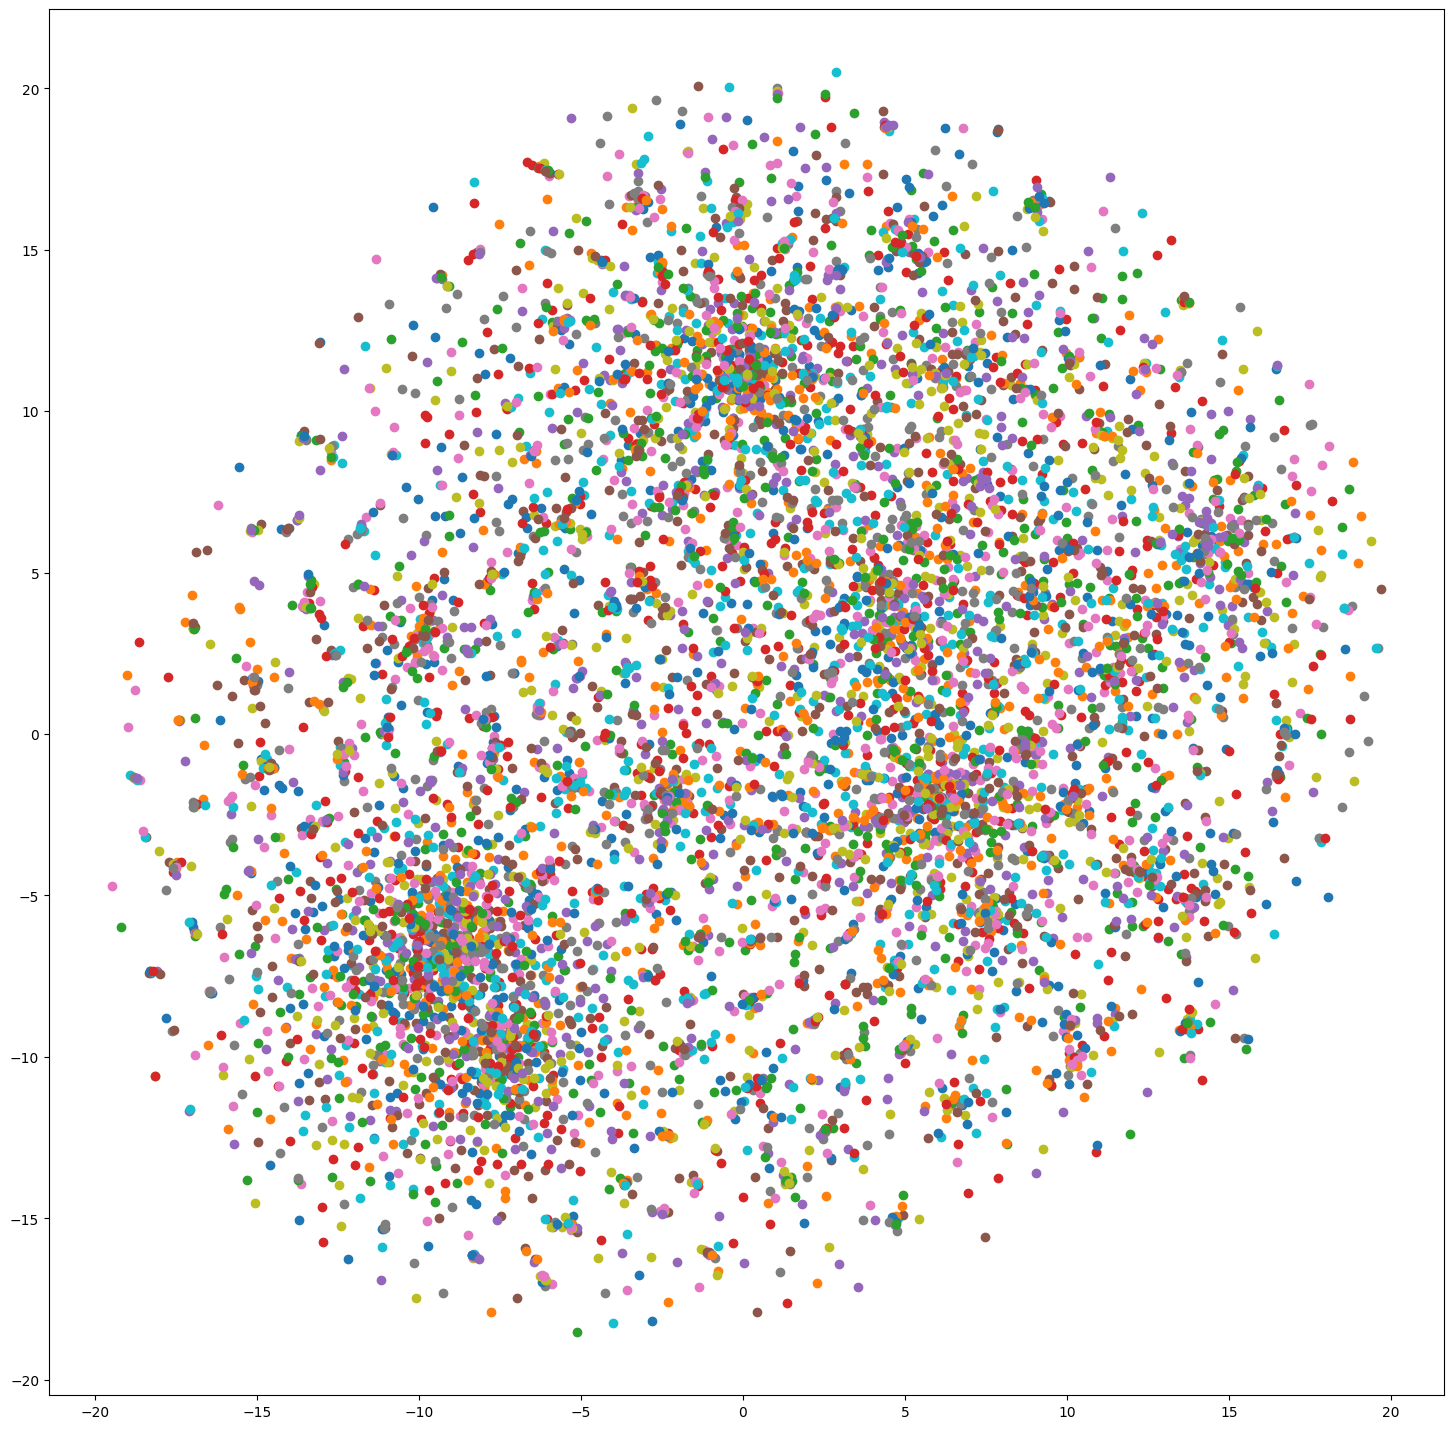

In [15]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        #labels.append(word)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        # plt.annotate(labels[i],
        #             xy=(x[i], y[i]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')
    plt.show()
   
tsne_plot(model_all)